In [ ]:
#Кумакешв Ф.В. @wewastetimefaded ТФэ-01-21 

Text(0, 0.5, 'Термический КПД, %')

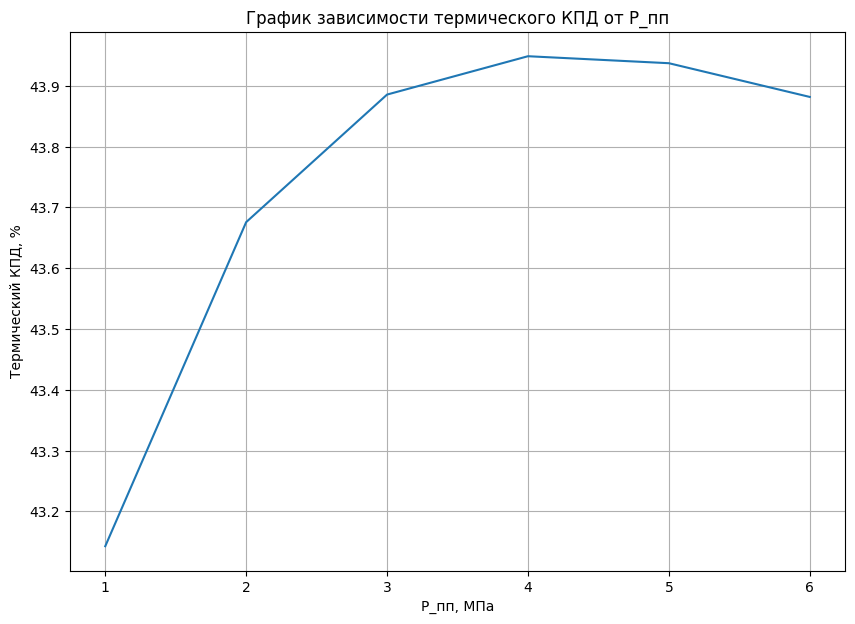

In [2]:
#Задание №1 Построить график зависимости термического КПД от давления промежуточного перегрева водяного пара для условий примера: 
#Р_0 = 12 МПа; t_0=530 °;P_k =5 кПа. 
#Параметры промперегре вP_п =1, 2, 3, 4, ,ПаМt и Пап =530 °С.

import numpy as np
import matplotlib.pyplot as plt
import iapws 
from iapws import IAPWS97 as gas

MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
grad_Cels = 1

p_O = 12 * MPa
p_k = 5 * kPa
t_O = 450 * grad_Cels
p_nn = np.array([1, 2, 3, 4, 5, 6])
t_nn = 530 * grad_Cels

fig, graf = plt.subplots(1, 1, figsize=(10, 7))
efficiency = []
for P_nn in p_nn:
    point_0_start = gas(P = p_O * unit, T=(t_O + 273.15))
    point_0_end = gas(P = P_nn, s=point_0_start.s)
    point_1_start = gas(P = P_nn, T= (t_nn + 273.15))
    point_condenser = gas(P = p_k * unit, s=point_1_start.s)
    point_pump = gas(P = p_k * unit, x=0)
    useful_energy = (point_0_start.h - point_0_end.h) + (point_1_start.h - point_condenser.h)
    full_energy = (point_0_start.h - point_pump.h) + (point_1_start.h - point_0_end.h)
    efficiency_value = (useful_energy / full_energy)*100
    efficiency.append(efficiency_value)
graf.plot(p_nn,efficiency, label=f"При P_пп = {p_nn} (КПа)")
graf.grid()
graf.set_title("График зависимости термического КПД от P_пп")
graf.set_xlabel("P_пп, МПа")
graf.set_ylabel("Термический КПД, %")

In [3]:
#Задача №2 При удельных расходах водяного пара d_01 = 2,9 кг/(кВт·ч) и d_02 = 3,4 кг/(кВт·ч) 
#оценить удельные расходы теплоты на выработку электроэнергии, приняв разность энтальп и_0- _п.в = 2400 кДж/кг.

d = [2.9, 3.4] # кг/(кВт*ч)
h0_h_nv = 2400 # кДж/кг

for m in d:
    Q = m * h0_h_nv /3600
    print(f'Значение удельного расхода теплоты на выработку электроэнергии при расходе d = {m} (кг/(кВт*ч)) Q = {round(Q,3)} кг/кВт*ч')

Значение удельного расхода теплоты на выработку электроэнергии при расходе d = 2.9 (кг/(кВт*ч)) Q = 1.933 кг/кВт*ч
Значение удельного расхода теплоты на выработку электроэнергии при расходе d = 3.4 (кг/(кВт*ч)) Q = 2.267 кг/кВт*ч


При p_0 = 5 МПа давление промперегрева 0.945 МПа
Температура промперегрева 500.0 °C
.
При p_0 = 6 МПа давление промперегрева 1.199 МПа
Температура промперегрева 500.0 °C
.
При p_0 = 7 МПа давление промперегрева 1.47 МПа
Температура промперегрева 500.0 °C
.
При p_0 = 8 МПа давление промперегрева 1.754 МПа
Температура промперегрева 500.0 °C
.
При p_0 = 9 МПа давление промперегрева 2.052 МПа
Температура промперегрева 500.0 °C
.
При p_0 = 10 МПа давление промперегрева 2.363 МПа
Температура промперегрева 500.0 °C
.
При p_0 = 11 МПа давление промперегрева 2.687 МПа
Температура промперегрева 500.0 °C
.
При p_0 = 12 МПа давление промперегрева 3.022 МПа
Температура промперегрева 500.0 °C
.


Text(0, 0.5, 'P_пром, МПа')

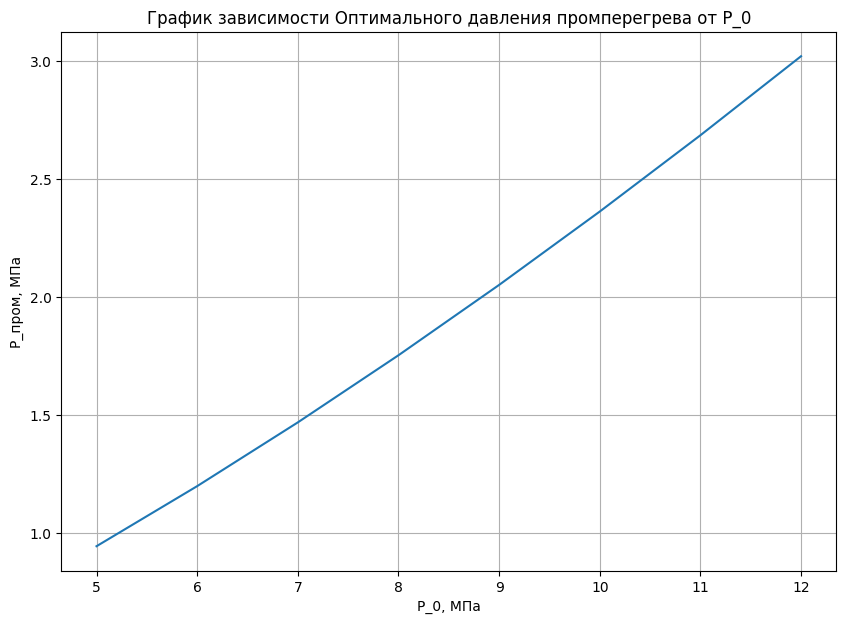

In [6]:
#Задание № 3 Написать код для решения задачи оптимизации параметров промежуточного перегрева Pпп и tпп для свободных начальных параметров Р0,t0,Рк.
#Сделаем допущение, что начальная точка процесса расширения всегда находится в зоне перегретого пара. 
#Решение должно выдавать параметры промежуточного перегрева и термический КПД при них. 
#На основе этого кода собрать информацию об оптимальных давлениях промежуточного перегрева и температуры при P0 от 5 до 12 МПа с шагом 1 МПа и температурой t0= 500 °С, Рк=5 кПа. 
#Сделать график функции оптимального давления промежуточного перегрева от давления.

import iapws
from iapws import IAPWS97 as gas
from scipy.optimize import minimize
import numpy as np
import numpy

MPa = 10 ** 6
kPa = 10 ** 3
mpa_to_unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

def chet_points(p_0: float, p_k: float,
    t_0: float, p_prom: float, t_prom: float):
        
    point_0_start = gas(T=t_0, P=p_0)
    point_0_end = gas(P=p_prom, s=point_0_start.s)
    point_1_start = gas(P=p_prom, T=t_prom)
    point_condenser = gas(P=p_k * mpa_to_unit, s=point_1_start.s)
    point_pump = gas(P=p_k * mpa_to_unit, x=0)

    return point_0_start, point_0_end, point_1_start, point_condenser, point_pump

def chet_efficiency(point_0_start, point_0_end, point_1_start, point_condenser, point_pump) -> float:
    useful_energy = (point_0_start.h - point_0_end.h) + (point_1_start.h - point_condenser.h)
    full_energy = (point_0_start.h - point_pump.h) + (point_1_start.h - point_0_end.h)
    return useful_energy / full_energy

def optimal_params( p_0: float, t_0: float, p_k: float) -> (float, float):
    def loss_function(middle_params, p_0 = p_0, t_0 = t_0, p_k = p_k):
        p_div_p_0, t_div_t_0 = middle_params[0], middle_params[1]
        p_prom = p_0 * p_div_p_0
        t_prom = t_0 * t_div_t_0
        point_0_start, point_0_end, point_1_start, point_condenser, point_pump = chet_points(
            p_0=p_0,
            p_k=p_k,
            t_0=to_kelvin(t_0),
            p_prom=p_prom,
            t_prom=to_kelvin(t_prom)
        )
        efficiency = chet_efficiency(point_0_start, point_0_end, point_1_start, point_condenser, point_pump)
        return 1 - efficiency

    initial_params = np.array([0.5, 0.5])
    bounds = ((0.01, 1), (0.01, 1))
    result = minimize(loss_function, x0 = initial_params, bounds = bounds, tol = 1e-8)
    p_div_p_0, t_div_t_0 = result.x
    p_prom = p_div_p_0 * p_0
    t_prom = t_div_t_0 * t_0
    return p_prom, t_prom

def chet_points(p_0: float, p_k: float,
    t_0: float, p_prom: float, t_prom: float):
        
    point_0_start = gas(T=t_0, P=p_0)
    point_0_end = gas(P=p_prom, s=point_0_start.s)
    point_1_start = gas(P=p_prom, T=t_prom)
    point_condenser = gas(P=p_k * mpa_to_unit, s=point_1_start.s)
    point_pump = gas(P=p_k * mpa_to_unit, x=0)

    return point_0_start, point_0_end, point_1_start, point_condenser, point_pump

def chet_efficiency(point_0_start, point_0_end, point_1_start, point_condenser, point_pump) -> float:
    useful_energy = (point_0_start.h - point_0_end.h) + (point_1_start.h - point_condenser.h)
    full_energy = (point_0_start.h - point_pump.h) + (point_1_start.h - point_0_end.h)
    return useful_energy / full_energy

fig, graf = plt.subplots(1, 1, figsize=(10, 7))
p_0 = range(5, 13)
t_0 = 500 #°C
p_k = 5 * kPa
p_pr = []
for p in p_0:
    p_prom, t_prom = (optimal_params(p,t_0,p_k))
    p_pr.append(p_prom)
    print(f"""При p_0 = {p} МПа давление промперегрева {round(p_prom, 3)} МПа
Температура промперегрева {t_prom} °C""")
    print(f".""")
graf.plot(p_0,p_pr)
graf.grid()
graf.set_title("График зависимости Оптимального давления промперегрева от P_0")
graf.set_xlabel("P_0, МПа")
graf.set_ylabel("P_пром, МПа")